In [1]:
#importing necessary libraries

#for computation
import pandas as pd
import numpy as np
import math

#for visualisation
import matplotlib.pyplot as plt

#for scaling,metrics and tensorflow
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#for building LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

In [2]:
df=pd.read_csv("netflix.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
#choosing the required feature
closed_price=df['Close']
closed_price.head()

0    254.259995
1    265.720001
2    264.559998
3    250.100006
4    249.470001
Name: Close, dtype: float64

In [5]:
#Scaling the data using MinMax Scaler
sc=MinMaxScaler()
closed_price=sc.fit_transform(np.array(closed_price).reshape(-1,1)).squeeze()

In [6]:
#splitting the data
train_size=int(len(closed_price)*0.8)
test_size=len(closed_price)-train_size

train,test=closed_price[0:train_size],closed_price[train_size:len(closed_price)]

In [7]:
#converting to array
def create(dataset,seq_len):
    x,y=[],[]
    for i in range(len(dataset)-seq_len-1):
        x.append(dataset[i:i+seq_len])
        y.append(dataset[i+seq_len])
    return np.array(x),np.array(y)

seq_len=10
xtrain,ytrain=create(train,seq_len)
xtest,ytest=create(test,seq_len)

In [8]:
xtrain.shape

(796, 10)

In [9]:
ytrain.shape

(796,)

In [10]:
xtest.shape

(191, 10)

In [11]:
ytest.shape

(191,)

In [12]:
#reshape input to be [samples,time,steps,features]
xtrain=np.reshape(xtrain,(xtrain.shape[0],1,xtrain.shape[1]))
xtest=np.reshape(xtest,(xtest.shape[0],1,xtest.shape[1]))

In [13]:
xtrain.shape

(796, 1, 10)

In [14]:
#building model
model=Sequential()
model.add(LSTM(4,input_shape=(1,seq_len)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,epochs=100,batch_size=300,verbose=1)

Epoch 1/100
3/3 [==============================] - 5s 8ms/step - loss: 0.0919
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0858
Epoch 3/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0790
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0728
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0686
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0636
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 0.0567
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0562
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0497
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0471
Epoch 11/100
3/3 [==============================] - 0s 12ms/step - loss: 0.0422
Epoch 12/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0398
Epoch 13/100
3/3 [==============================] - 0s 13

In [15]:
#prediction
trainpredict=model.predict(xtrain)
testpredict=model.predict(xtest)

6/6 [==============================] - 0s 3ms/step


In [16]:
trainpredict=sc.inverse_transform(trainpredict)
ytrain=sc.inverse_transform([ytrain])
testpredict=sc.inverse_transform(testpredict)
ytest=sc.inverse_transform([ytest])

In [17]:
#finding out RMSE value

trainscore=math.sqrt(mean_squared_error(ytrain[0],trainpredict[:,0]))
print("trainscore: %.2f "%(trainscore))
testscore=math.sqrt(mean_squared_error(ytest[0],testpredict[:,0]))
print("test score: %.2f "%(testscore))

trainscore: 17.96 
test score: 42.00 


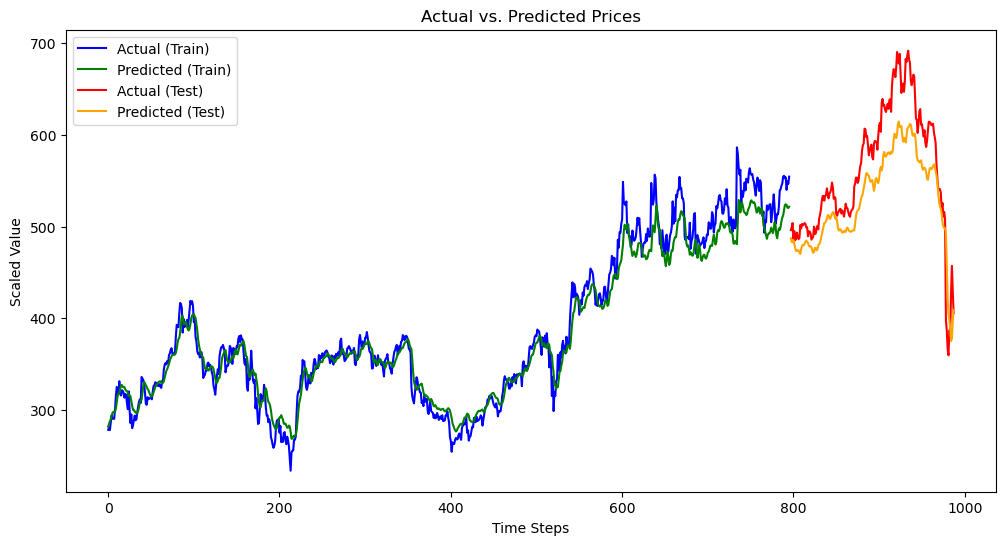

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(ytrain[0], label='Actual (Train)', color='blue')
plt.plot(trainpredict[:, 0], label='Predicted (Train)', color='green')
plt.plot(len(ytrain[0]) + np.arange(1, len(ytest[0]) + 1), ytest[0], label='Actual (Test)', color='red')
plt.plot(len(ytrain[0]) + np.arange(1, len(ytest[0]) + 1), testpredict[:, 0], label='Predicted (Test)', color='orange')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Value')
plt.legend()
plt.title('Actual vs. Predicted Prices')
plt.show()